#Question 1

In [ ]:
#Libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [ ]:
#Data preperation
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


Simple NN network

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(32, 32, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 48s 30ms/step - loss: 1.8802 - accuracy: 0.3315
Epoch 2/5
1563/1563 [==============================] - 33s 21ms/step - loss: 1.6992 - accuracy: 0.3944
Epoch 3/5
1563/1563 [==============================] - 33s 21ms/step - loss: 1.6304 - accuracy: 0.4183
Epoch 4/5
1563/1563 [==============================] - 34s 22ms/step - loss: 1.5919 - accuracy: 0.4330
Epoch 5/5
1563/1563 [==============================] - 34s 22ms/step - loss: 1.5651 - accuracy: 0.4447


In [ ]:
y_pred = model.predict(x_test)
y_pred[0]

313/313 [==============================] - 2s 5ms/step


array([0.04098273, 0.01781931, 0.07890327, 0.36347684, 0.02526409,
       0.18229859, 0.20877759, 0.00075244, 0.07736977, 0.00435547],
      dtype=float32)

In [ ]:
predictions = []
for i in range(10000):
  p = np.argmax(y_pred[i])
  predictions.append(p)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.53      0.48      0.50      1000
           1       0.55      0.58      0.57      1000
           2       0.29      0.40      0.34      1000
           3       0.36      0.16      0.22      1000
           4       0.36      0.40      0.38      1000
           5       0.35      0.42      0.38      1000
           6       0.47      0.51      0.49      1000
           7       0.58      0.44      0.50      1000
           8       0.51      0.69      0.59      1000
           9       0.57      0.42      0.48      1000

    accuracy                           0.45     10000
   macro avg       0.46      0.45      0.44     10000
weighted avg       0.46      0.45      0.44     10000



In [ ]:
y_pred.shape

(10000, 10)

In [ ]:
#changing the number of neurons in the NN layer
model_2 = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(32, 32, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])

model_2.fit(x_train, y_train, epochs=5)

test_loss, test_acc = model_2.evaluate(x_test,  y_test, verbose=2)
print(test_acc)

Epoch 1/5
1563/1563 [==============================] - 16s 10ms/step - loss: 1.8886 - accuracy: 0.3217
Epoch 2/5
1563/1563 [==============================] - 15s 10ms/step - loss: 1.7163 - accuracy: 0.3864
Epoch 3/5
1563/1563 [==============================] - 15s 9ms/step - loss: 1.6608 - accuracy: 0.4085
Epoch 4/5
1563/1563 [==============================] - 15s 9ms/step - loss: 1.6259 - accuracy: 0.4238
Epoch 5/5
1563/1563 [==============================] - 15s 10ms/step - loss: 1.6006 - accuracy: 0.4324
313/313 - 1s - loss: 1.6157 - accuracy: 0.4258 - 1s/epoch - 3ms/step
0.42579999566078186


In [ ]:
#varying the number of layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(32, 32, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])

model_2.fit(x_train, y_train, epochs=5)

test_loss, test_acc = model_2.evaluate(x_test,  y_test, verbose=2)
print(test_acc)

Epoch 1/5
1563/1563 [==============================] - 87s 55ms/step - loss: 1.8484 - accuracy: 0.3355
Epoch 2/5
1563/1563 [==============================] - 75s 48ms/step - loss: 1.6612 - accuracy: 0.4037
Epoch 3/5
1563/1563 [==============================] - 76s 49ms/step - loss: 1.5808 - accuracy: 0.4352
Epoch 4/5
1563/1563 [==============================] - 76s 48ms/step - loss: 1.5388 - accuracy: 0.4509
Epoch 5/5
1563/1563 [==============================] - 75s 48ms/step - loss: 1.5045 - accuracy: 0.4602
313/313 - 3s - loss: 1.5196 - accuracy: 0.4555 - 3s/epoch - 9ms/step
0.4555000066757202


In [ ]:
#evaluating the model on mean square error loss function
#changing loss from sparse categorical cross entropy to mean square error
model.compile(optimizer='Adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy']
              )


model.fit(x_train, y_train, epochs=5)

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(test_acc)

Epoch 1/5
1563/1563 [==============================] - 34s 21ms/step - loss: 27.6103 - accuracy: 0.1088
Epoch 2/5
1563/1563 [==============================] - 33s 21ms/step - loss: 27.6101 - accuracy: 0.1028
Epoch 3/5
1563/1563 [==============================] - 34s 22ms/step - loss: 27.6101 - accuracy: 0.0998
Epoch 4/5
1563/1563 [==============================] - 33s 21ms/step - loss: 27.6101 - accuracy: 0.0959
Epoch 5/5
1563/1563 [==============================] - 33s 21ms/step - loss: 27.6101 - accuracy: 0.0990
313/313 - 2s - loss: 27.6100 - accuracy: 0.1002 - 2s/epoch - 8ms/step
0.10019999742507935


In [ ]:
#changing the optimizer to SGD
model.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


model.fit(x_train, y_train, epochs=5)


test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(test_acc)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 17s 11ms/step - loss: 2.3027 - accuracy: 0.0967
Epoch 2/5
1563/1563 [==============================] - 17s 11ms/step - loss: 2.3027 - accuracy: 0.0987
Epoch 3/5
1563/1563 [==============================] - 17s 11ms/step - loss: 2.3027 - accuracy: 0.0980
Epoch 4/5
1563/1563 [==============================] - 16s 11ms/step - loss: 2.3027 - accuracy: 0.0987
Epoch 5/5
1563/1563 [==============================] - 17s 11ms/step - loss: 2.3027 - accuracy: 0.0968
313/313 - 2s - loss: 2.3025 - accuracy: 0.1000 - 2s/epoch - 5ms/step
0.10000000149011612


In [ ]:
#changing the learning rate

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.05),
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(test_acc)

Epoch 1/5
1563/1563 [==============================] - 35s 21ms/step - loss: 2.4461 - accuracy: 0.1001
Epoch 2/5
1563/1563 [==============================] - 33s 21ms/step - loss: 2.3082 - accuracy: 0.1030
Epoch 3/5
1563/1563 [==============================] - 33s 21ms/step - loss: 2.3092 - accuracy: 0.0994
Epoch 4/5
1563/1563 [==============================] - 34s 22ms/step - loss: 2.3091 - accuracy: 0.0988
Epoch 5/5
1563/1563 [==============================] - 33s 21ms/step - loss: 2.3095 - accuracy: 0.0987
313/313 - 2s - loss: 2.3059 - accuracy: 0.1000 - 2s/epoch - 5ms/step
0.10000000149011612


# **CNN Implementation**

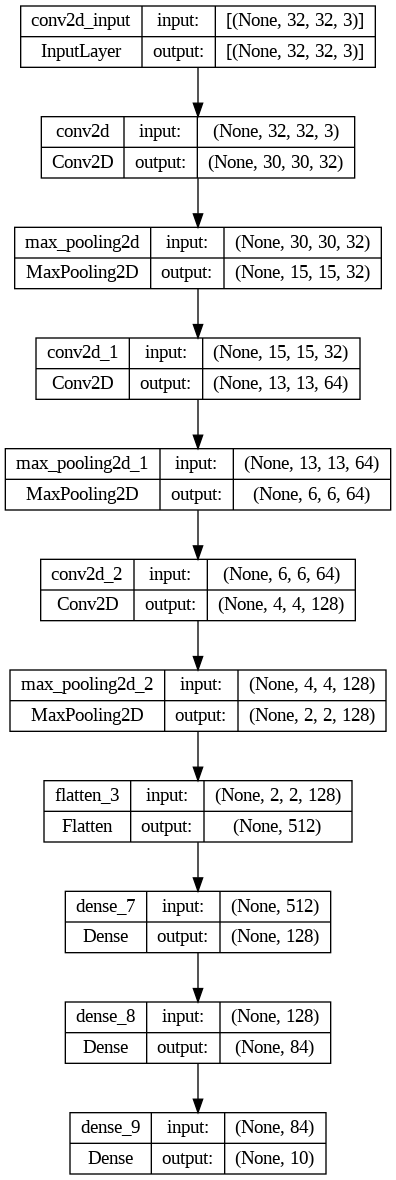

In [ ]:
CNN_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(input_shape =(1,1,128)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])


tf.keras.utils.plot_model(CNN_model, show_shapes=True)

In [ ]:
CNN_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)        

In [ ]:
CNN_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
CNN_model.fit(x_train, y_train, epochs=15,validation_data=(x_test, y_test))


Epoch 1/15
1563/1563 [==============================] - 73s 46ms/step - loss: 1.6163 - accuracy: 0.4312 - val_loss: 1.4014 - val_accuracy: 0.4933
Epoch 2/15
1563/1563 [==============================] - 72s 46ms/step - loss: 1.2580 - accuracy: 0.5565 - val_loss: 1.2235 - val_accuracy: 0.5663
Epoch 3/15
1563/1563 [==============================] - 70s 45ms/step - loss: 1.1174 - accuracy: 0.6104 - val_loss: 1.1136 - val_accuracy: 0.6163
Epoch 4/15
1563/1563 [==============================] - 69s 44ms/step - loss: 1.0135 - accuracy: 0.6492 - val_loss: 1.0792 - val_accuracy: 0.6350
Epoch 5/15
1563/1563 [==============================] - 71s 45ms/step - loss: 0.9374 - accuracy: 0.6768 - val_loss: 1.0374 - val_accuracy: 0.6482
Epoch 6/15
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8731 - accuracy: 0.6996 - val_loss: 1.0045 - val_accuracy: 0.6692
Epoch 7/15
1563/1563 [==============================] - 71s 45ms/step - loss: 0.8172 - accuracy: 0.7177 - val_loss: 0.9897 -

In [ ]:
y_pred = CNN_model.predict(x_test)
y_pred[0]
predictions = []


for i in range(10000):
  p = np.argmax(y_pred[i])
  predictions.append(p)



print(classification_report(y_test,predictions))

313/313 [==============================] - 5s 17ms/step
              precision    recall  f1-score   support

           0       0.74      0.71      0.73      1000
           1       0.88      0.77      0.82      1000
           2       0.62      0.55      0.58      1000
           3       0.43      0.61      0.50      1000
           4       0.71      0.55      0.62      1000
           5       0.57      0.59      0.58      1000
           6       0.69      0.81      0.74      1000
           7       0.75      0.68      0.72      1000
           8       0.75      0.81      0.78      1000
           9       0.84      0.74      0.78      1000

    accuracy                           0.68     10000
   macro avg       0.70      0.68      0.68     10000
weighted avg       0.70      0.68      0.68     10000



In [ ]:
#changing the number of layers
CNN_model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(input_shape =(1,1,128)),
    tf.keras.layers.Dense(128, activation='relu'),

    tf.keras.layers.Dense(10, activation='softmax'),
])


CNN_model_2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
CNN_model_2.fit(x_train, y_train, epochs=5,validation_data=(x_test, y_test))


test_loss, test_acc = CNN_model_2.evaluate(x_test,  y_test, verbose=2)
print(test_acc)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 73s 46ms/step - loss: 1.6516 - accuracy: 0.4433 - val_loss: 1.2884 - val_accuracy: 0.5372
Epoch 2/5
1563/1563 [==============================] - 71s 46ms/step - loss: 1.2121 - accuracy: 0.5771 - val_loss: 1.1651 - val_accuracy: 0.5939
Epoch 3/5
1563/1563 [==============================] - 70s 45ms/step - loss: 1.0755 - accuracy: 0.6251 - val_loss: 1.1031 - val_accuracy: 0.6232
Epoch 4/5
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9741 - accuracy: 0.6617 - val_loss: 1.1039 - val_accuracy: 0.6193
Epoch 5/5
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8925 - accuracy: 0.6924 - val_loss: 1.0242 - val_accuracy: 0.6482
313/313 - 5s - loss: 1.0242 - accuracy: 0.6482 - 5s/epoch - 15ms/step
0.6481999754905701


In [ ]:
#adam was changed to SGD
CNN_model.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
CNN_model.fit(x_train, y_train, epochs=5,validation_data=(x_test, y_test))

test_loss, test_acc = CNN_model.evaluate(x_test,  y_test, verbose=2)
print(test_acc)

Epoch 1/5
1563/1563 [==============================] - 70s 44ms/step - loss: 1.4315 - accuracy: 0.5104 - val_loss: 1.3930 - val_accuracy: 0.5880
Epoch 2/5
1563/1563 [==============================] - 67s 43ms/step - loss: 0.8136 - accuracy: 0.7319 - val_loss: 1.6885 - val_accuracy: 0.5147
Epoch 3/5
1563/1563 [==============================] - 71s 45ms/step - loss: 0.6803 - accuracy: 0.7780 - val_loss: 1.2822 - val_accuracy: 0.6521
Epoch 4/5
1563/1563 [==============================] - 72s 46ms/step - loss: 0.6190 - accuracy: 0.7973 - val_loss: 1.2657 - val_accuracy: 0.6548
Epoch 5/5
1563/1563 [==============================] - 74s 47ms/step - loss: 0.5734 - accuracy: 0.8117 - val_loss: 1.2572 - val_accuracy: 0.6576
313/313 - 5s - loss: 1.2572 - accuracy: 0.6576 - 5s/epoch - 17ms/step
0.6575999855995178


In [ ]:
#loss was changed to mean square error
CNN_model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])
CNN_model.fit(x_train, y_train, epochs=5,validation_data=(x_test, y_test))

test_loss, test_acc = CNN_model.evaluate(x_test,  y_test, verbose=2)
print(test_acc)

Epoch 1/5
1563/1563 [==============================] - 71s 45ms/step - loss: 27.6109 - accuracy: 0.1264 - val_loss: 27.6100 - val_accuracy: 0.1245
Epoch 2/5
1563/1563 [==============================] - 70s 44ms/step - loss: 27.6101 - accuracy: 0.1205 - val_loss: 27.6100 - val_accuracy: 0.1215
Epoch 3/5
1563/1563 [==============================] - 67s 43ms/step - loss: 27.6101 - accuracy: 0.1199 - val_loss: 27.6100 - val_accuracy: 0.1256
Epoch 4/5
1563/1563 [==============================] - 69s 44ms/step - loss: 27.6101 - accuracy: 0.1197 - val_loss: 27.6100 - val_accuracy: 0.1090
Epoch 5/5
1563/1563 [==============================] - 69s 44ms/step - loss: 27.6101 - accuracy: 0.1097 - val_loss: 27.6100 - val_accuracy: 0.0995
313/313 - 3s - loss: 27.6100 - accuracy: 0.0995 - 3s/epoch - 11ms/step
0.09950000047683716


#DEEP NN

In [ ]:
deep_model = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(32, 32, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2560, activation='relu'),
    tf.keras.layers.Dense(1792, activation='relu'),
    tf.keras.layers.Dense(780, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

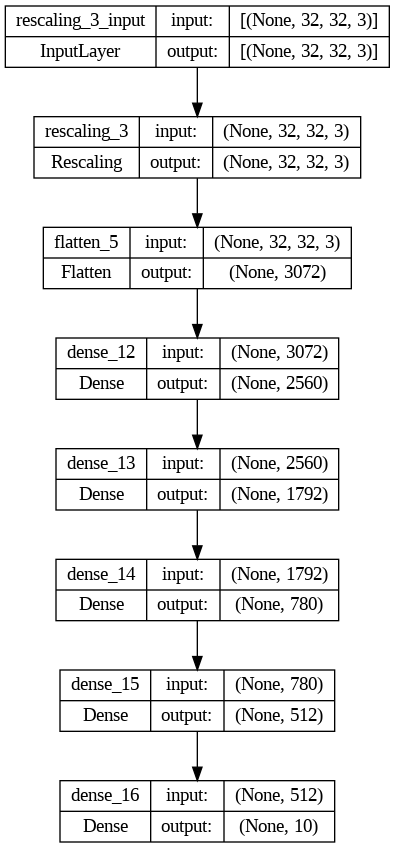

In [ ]:
deep_model.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

tf.keras.utils.plot_model(deep_model,  show_shapes=True)

In [ ]:
deep_model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 155s 99ms/step - loss: 1.8226 - accuracy: 0.3431
Epoch 2/5
1563/1563 [==============================] - 152s 97ms/step - loss: 1.6197 - accuracy: 0.4207
Epoch 3/5
1563/1563 [==============================] - 156s 100ms/step - loss: 1.5301 - accuracy: 0.4554
Epoch 4/5
1563/1563 [==============================] - 157s 100ms/step - loss: 1.4635 - accuracy: 0.4798
Epoch 5/5
1563/1563 [==============================] - 154s 99ms/step - loss: 1.4081 - accuracy: 0.4988


In [ ]:
y_pred = deep_model.predict(x_test)
y_pred[0]
predictions = []


for i in range(10000):
  p = np.argmax(y_pred[i])
  predictions.append(p)



print(classification_report(y_test,predictions))

313/313 [==============================] - 10s 33ms/step
              precision    recall  f1-score   support

           0       0.63      0.46      0.53      1000
           1       0.68      0.57      0.62      1000
           2       0.39      0.23      0.29      1000
           3       0.41      0.14      0.21      1000
           4       0.29      0.61      0.39      1000
           5       0.55      0.21      0.30      1000
           6       0.36      0.75      0.48      1000
           7       0.60      0.45      0.51      1000
           8       0.54      0.71      0.61      1000
           9       0.62      0.50      0.55      1000

    accuracy                           0.46     10000
   macro avg       0.51      0.46      0.45     10000
weighted avg       0.51      0.46      0.45     10000



In [ ]:
#changing the neurons/layers
deep_model_2 = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(32, 32, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1560, activation='relu'),
    tf.keras.layers.Dense(792, activation='relu'),

    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

deep_model.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

tf.keras.utils.plot_model(deep_model,  show_shapes=True)

deep_model.fit(x_train, y_train, epochs=5)



test_loss, test_acc = deep_model.evaluate(x_test,  y_test, verbose=2)
print(test_acc)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 155s 99ms/step - loss: 1.3626 - accuracy: 0.5157
Epoch 2/5
1563/1563 [==============================] - 152s 97ms/step - loss: 1.3192 - accuracy: 0.5316
Epoch 3/5
1563/1563 [==============================] - 154s 99ms/step - loss: 1.2758 - accuracy: 0.5467
Epoch 4/5
1563/1563 [==============================] - 157s 100ms/step - loss: 1.2394 - accuracy: 0.5621
Epoch 5/5
1563/1563 [==============================] - 155s 99ms/step - loss: 1.2010 - accuracy: 0.5726
313/313 - 10s - loss: 1.4902 - accuracy: 0.4736 - 10s/epoch - 31ms/step
0.47360000014305115


In [ ]:
#changing the optimizer SGD to adam
deep_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])




deep_model.fit(x_train, y_train, epochs=3)



test_loss, test_acc = deep_model.evaluate(x_test,  y_test, verbose=2)
print(test_acc)

Epoch 1/5
1136/1563 [====================>.........] - ETA: 1:30 - loss: 2.0175 - accuracy: 0.2876

KeyboardInterrupt: ignored

In [ ]:
#changing loss to mean square loss
deep_model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])




deep_model.fit(x_train, y_train, epochs=3)



test_loss, test_acc = deep_model.evaluate(x_test,  y_test, verbose=2)
print(test_acc)

#question 2#


In [ ]:
#Data preperation
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (5, 5), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (5, 5), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model_1.fit(x_train, y_train, epochs=5,validation_data=(x_test, y_test))





test_loss, test_acc = model_1.evaluate(x_test,  y_test, verbose=2)
print(test_acc)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 85s 54ms/step - loss: 2.1831 - accuracy: 0.3014 - val_loss: 1.5730 - val_accuracy: 0.4240
Epoch 2/5
1563/1563 [==============================] - 63s 41ms/step - loss: 1.5093 - accuracy: 0.4566 - val_loss: 1.3554 - val_accuracy: 0.5152
Epoch 3/5
1563/1563 [==============================] - 67s 43ms/step - loss: 1.3246 - accuracy: 0.5343 - val_loss: 1.2921 - val_accuracy: 0.5494
Epoch 4/5
1563/1563 [==============================] - 66s 42ms/step - loss: 1.2048 - accuracy: 0.5776 - val_loss: 1.1888 - val_accuracy: 0.5888
Epoch 5/5
1563/1563 [==============================] - 78s 50ms/step - loss: 1.1091 - accuracy: 0.6129 - val_loss: 1.1171 - val_accuracy: 0.6148
313/313 - 5s - loss: 1.1171 - accuracy: 0.6148 - 5s/epoch - 16ms/step
0.614799976348877


In [ ]:
model_2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model_2.fit(x_train, y_train, epochs=5,validation_data=(x_test, y_test))





test_loss, test_acc = model_2.evaluate(x_test,  y_test, verbose=2)
print(test_acc)

Epoch 1/5
1563/1563 [==============================] - 92s 58ms/step - loss: 2.4796 - accuracy: 0.1079 - val_loss: 2.2871 - val_accuracy: 0.1397
Epoch 2/5
1563/1563 [==============================] - 87s 55ms/step - loss: 2.2244 - accuracy: 0.1583 - val_loss: 1.8053 - val_accuracy: 0.3363
Epoch 3/5
1563/1563 [==============================] - 86s 55ms/step - loss: 1.6276 - accuracy: 0.4109 - val_loss: 1.4890 - val_accuracy: 0.4745
Epoch 4/5
1563/1563 [==============================] - 85s 54ms/step - loss: 1.3888 - accuracy: 0.5036 - val_loss: 1.2841 - val_accuracy: 0.5533
Epoch 5/5
1563/1563 [==============================] - 85s 55ms/step - loss: 1.2645 - accuracy: 0.5538 - val_loss: 1.3240 - val_accuracy: 0.5406
313/313 - 4s - loss: 1.3240 - accuracy: 0.5406 - 4s/epoch - 13ms/step
0.5406000018119812


In [ ]:
model_3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model_3.fit(x_train, y_train, epochs=5,validation_data=(x_test, y_test))





test_loss, test_acc = model_3.evaluate(x_test,  y_test, verbose=2)
print(test_acc)

Epoch 1/5
1563/1563 [==============================] - 88s 55ms/step - loss: 2.3441 - accuracy: 0.0972 - val_loss: 2.3026 - val_accuracy: 0.1001
Epoch 2/5
1563/1563 [==============================] - 86s 55ms/step - loss: 2.3033 - accuracy: 0.0979 - val_loss: 2.3029 - val_accuracy: 0.1001
Epoch 3/5
1563/1563 [==============================] - 86s 55ms/step - loss: 2.3029 - accuracy: 0.0964 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/5
1563/1563 [==============================] - 87s 56ms/step - loss: 2.3028 - accuracy: 0.0976 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/5
1563/1563 [==============================] - 86s 55ms/step - loss: 2.3028 - accuracy: 0.0984 - val_loss: 2.3027 - val_accuracy: 0.1000
313/313 - 4s - loss: 2.3027 - accuracy: 0.1000 - 4s/epoch - 13ms/step
0.10000000149011612


In [ ]:
learning_rates = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]

accuracies = []
learning_rate_values = []


for i in learning_rates:

    model = model_1
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=i), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


    history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test,y_test))


    final_accuracy = history.history['accuracy'][-1]

    accuracies.append(final_accuracy)
    learning_rate_values.append(i)



Epoch 1/5
1563/1563 [==============================] - 79s 50ms/step - loss: 2.3114 - accuracy: 0.0987 - val_loss: 2.3042 - val_accuracy: 0.1000
Epoch 2/5
1563/1563 [==============================] - 70s 44ms/step - loss: 2.3039 - accuracy: 0.0990 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 3/5
1563/1563 [==============================] - 74s 47ms/step - loss: 2.3039 - accuracy: 0.1003 - val_loss: 2.3044 - val_accuracy: 0.1000
Epoch 4/5
1563/1563 [==============================] - 68s 43ms/step - loss: 2.3041 - accuracy: 0.0982 - val_loss: 2.3037 - val_accuracy: 0.1000
Epoch 5/5
1563/1563 [==============================] - 70s 45ms/step - loss: 2.3039 - accuracy: 0.1000 - val_loss: 2.3032 - val_accuracy: 0.1000
Epoch 1/5
1563/1563 [==============================] - 71s 45ms/step - loss: 2.3052 - accuracy: 0.1020 - val_loss: 2.3050 - val_accuracy: 0.1000
Epoch 2/5
1563/1563 [==============================] - 68s 43ms/step - loss: 2.3053 - accuracy: 0.0973 - val_loss: 2.3043 - val_ac

In [ ]:
batch_sizes = [8, 16, 32, 64, 128, 256, 512]


accuracies = []
batch_size_val = []


for i in batch_sizes:

    model = model_1
    model.compile(optimizer=tf.keras.optimizers.adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


    history = model.fit(x_train, y_train, epochs=5, batch_size=i, validation_data=(x_test,y_test))


    final_accuracy = history.history['accuracy'][-1]

    accuracies.append(final_accuracy)
    batch_size_val.append(i)



Epoch 1/5
6250/6250 [==============================] - 91s 14ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 2/5
6250/6250 [==============================] - 90s 14ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 3/5
6250/6250 [==============================] - 89s 14ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 4/5
6250/6250 [==============================] - 85s 14ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 5/5
6250/6250 [==============================] - 85s 14ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 1/5
3125/3125 [==============================] - 69s 22ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 2/5
3125/3125 [==============================] - 68s 22ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 3/5
3125/3125 [======

In [ ]:


dropout_rates = [0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
accuracies = []
dropout_val = []


for i in batch_sizes:
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
    model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(i),
    tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


    history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test,y_test))


    final_accuracy = history.history['accuracy'][-1]

    accuracies.append(final_accuracy)
    dropout_val.append(i)



ValueError: ignored

In [ ]:
def show_img(img):
  plt.figure(figsize=(10, 2))
  for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[i])
    plt.axis('off')
  plt.show()


In [ ]:
def aug(image):
  resize_and_rescale = tf.keras.Sequential([ tf.keras.layers.Resizing(32,32),tf.keras.layers.Rescaling(1./255)])
  data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.9),])
  res = resize_and_rescale(image)
  img = data_augmentation(res)
  return img


In [ ]:
img = aug(x_train)

In [ ]:
model_1.fit(img, y_train, epochs=5,validation_data=(x_test, y_test))